# Fouille de graphes

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from itertools import combinations

In [2]:
%matplotlib inline

In [3]:
def sorted_dict(d):
    return sorted(d.items(), key=lambda t: t[1], reverse=True)

def top_k_triplets(triplets, k):
    return sorted(triplets, key=lambda t: t[2], reverse=True)[:k]

def generic_adamic_adar(g, ebunch=None):
    if ebunch is None:
        ebunch = nx.non_edges(g) # connexion non existante dans le graphe

    def predict(u, v):
        return sum([1. / math.log(g.degree(w)) for w in generic_common_neighbors(g, u, v)])

    return [(u, v, predict(u, v)) for u, v in ebunch]

## Graphes non orientés
Stockez dans une variable le graphe non orienté contenu dans le fichier `data/graph1.txt` (le format de ce fichier est appelé Edge List dans la nomenclature NetworkX).  
Affichez la liste de ses noeuds et la liste de ses liens.

In [4]:
with open('data/graph1.txt') as f:
    data_1 = list(map(lambda x: x.split(), f.readlines()))

In [5]:
print(f'nodes :{set(sum(data_1, []))}\nedges: {data_1}')

nodes :{'D', 'E', 'B', 'A', 'C'}
edges: [['A', 'B'], ['B', 'C'], ['A', 'D'], ['D', 'E'], ['C', 'D']]


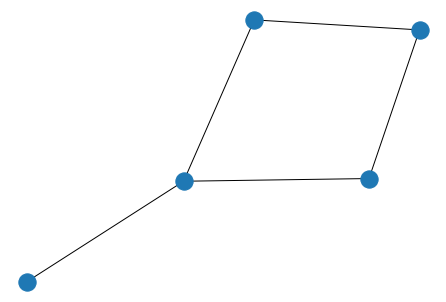

In [6]:
graph_1 = nx.Graph()
graph_1.add_edges_from(data_1)
nx.draw(graph_1)

Affichez, pour chacun des noeuds de ce graphe, son degré et la liste de ses voisins dans le graphe

In [7]:
nodes = dict()
for node1, node2 in data_1:
    nodes[node1] = nodes.get(node1,[]) + [node2]
    nodes[node2] = nodes.get(node2,[]) + [node1]
{node: (len(k),k) for node,k in nodes.items()}

{'A': (2, ['B', 'D']),
 'B': (2, ['A', 'C']),
 'C': (2, ['B', 'D']),
 'D': (3, ['A', 'E', 'C']),
 'E': (1, ['D'])}

Affichez, pour chaque paire de noeuds du graphe, un chemin menant d'un noeud à l'autre dans le graphe, s'il en existe.

In [8]:
for x in combinations(graph_1.nodes(), 2):
    print(f"{x}: {nx.shortest_path(graph_1, *x)}")

('A', 'B'): ['A', 'B']
('A', 'C'): ['A', 'B', 'C']
('A', 'D'): ['A', 'D']
('A', 'E'): ['A', 'D', 'E']
('B', 'C'): ['B', 'C']
('B', 'D'): ['B', 'A', 'D']
('B', 'E'): ['B', 'A', 'D', 'E']
('C', 'D'): ['C', 'D']
('C', 'E'): ['C', 'D', 'E']
('D', 'E'): ['D', 'E']


## Graphes orientés
Effectuez les mêmes manipulations pour `data/graphM2.txt`

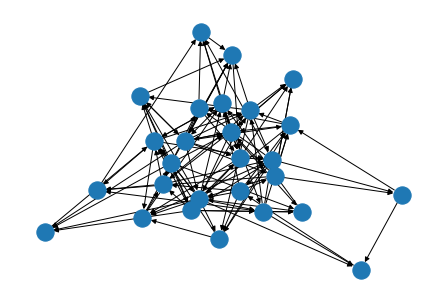

In [9]:
graph_2 = nx.readwrite.edgelist.read_edgelist("data/graphM2.txt", create_using=nx.DiGraph())
nx.draw(graph_2)

In [10]:
print(f'nodes: {graph_2.nodes}\nedges: {graph_2.edges}')

nodes: ['PERRAULT_HELENE', 'HERSANT_MARC', 'TUFFIGO_MAX', 'LAI_XAVIER', 'GUILGAULT_RIPPES_EMMA', 'COAT_MORGANE', 'BARRY_MAMADOU_ALPHA', 'RAKOTOSON_LOIC', 'THOMAS_AÏLIS', 'LEPAGNOL_PIERRE', 'AGHBALOU_ZAID', 'VICTOIRE_JULIETTE', 'ABDALLAH_KARINE', 'MAHE_CORENTIN', 'LE_BOURHIS_MANON', 'BERNARD_BAPTISTE', 'BRIENT_THOMAS', 'MAHEU_CLAUDE_VIC', 'MORIN_ALEXIS', 'COUSIN_CELESTIN', 'PHILIPPE_LAURIANE', 'CARRIC_QUENTIN', 'COIC_LENA', 'ADAM_ANTOINE', 'MONFRET_DYLAN', 'ADAM_JAMES', 'COLSON_PIERRE_YVES']
edges: [('PERRAULT_HELENE', 'HERSANT_MARC'), ('HERSANT_MARC', 'AGHBALOU_ZAID'), ('HERSANT_MARC', 'BRIENT_THOMAS'), ('HERSANT_MARC', 'THOMAS_AÏLIS'), ('HERSANT_MARC', 'PHILIPPE_LAURIANE'), ('HERSANT_MARC', 'GUILGAULT_RIPPES_EMMA'), ('HERSANT_MARC', 'COAT_MORGANE'), ('HERSANT_MARC', 'MAHEU_CLAUDE_VIC'), ('TUFFIGO_MAX', 'LAI_XAVIER'), ('TUFFIGO_MAX', 'GUILGAULT_RIPPES_EMMA'), ('TUFFIGO_MAX', 'COAT_MORGANE'), ('LAI_XAVIER', 'LE_BOURHIS_MANON'), ('LAI_XAVIER', 'BERNARD_BAPTISTE'), ('GUILGAULT_RIPPES_EMMA

In [11]:
{x[0]: (x[1], list(graph_2.neighbors(x[0]))) for x in graph_2.degree}

{'PERRAULT_HELENE': (5, ['HERSANT_MARC']),
 'HERSANT_MARC': (13,
  ['AGHBALOU_ZAID',
   'BRIENT_THOMAS',
   'THOMAS_AÏLIS',
   'PHILIPPE_LAURIANE',
   'GUILGAULT_RIPPES_EMMA',
   'COAT_MORGANE',
   'MAHEU_CLAUDE_VIC']),
 'TUFFIGO_MAX': (10, ['LAI_XAVIER', 'GUILGAULT_RIPPES_EMMA', 'COAT_MORGANE']),
 'LAI_XAVIER': (6, ['LE_BOURHIS_MANON', 'BERNARD_BAPTISTE']),
 'GUILGAULT_RIPPES_EMMA': (8,
  ['BRIENT_THOMAS', 'MAHEU_CLAUDE_VIC', 'MORIN_ALEXIS']),
 'COAT_MORGANE': (12,
  ['COUSIN_CELESTIN',
   'ADAM_JAMES',
   'GUILGAULT_RIPPES_EMMA',
   'MONFRET_DYLAN',
   'ADAM_ANTOINE',
   'COLSON_PIERRE_YVES']),
 'BARRY_MAMADOU_ALPHA': (9,
  ['RAKOTOSON_LOIC',
   'THOMAS_AÏLIS',
   'LEPAGNOL_PIERRE',
   'AGHBALOU_ZAID',
   'VICTOIRE_JULIETTE',
   'COAT_MORGANE']),
 'RAKOTOSON_LOIC': (6, ['MAHEU_CLAUDE_VIC', 'CARRIC_QUENTIN']),
 'THOMAS_AÏLIS': (5, ['COUSIN_CELESTIN']),
 'LEPAGNOL_PIERRE': (10,
  ['AGHBALOU_ZAID', 'LE_BOURHIS_MANON', 'ADAM_ANTOINE', 'CARRIC_QUENTIN']),
 'AGHBALOU_ZAID': (11,
  ['COAT_M

Comment obtenir les degrés entrant et sortant d'un noeud ?

In [12]:
for node in graph_2.nodes:
    print(f"{node:<21} |in: {graph_2.in_degree(node)}, out: {graph_2.out_degree(node)}")

PERRAULT_HELENE       |in: 4, out: 1
HERSANT_MARC          |in: 6, out: 7
TUFFIGO_MAX           |in: 7, out: 3
LAI_XAVIER            |in: 4, out: 2
GUILGAULT_RIPPES_EMMA |in: 5, out: 3
COAT_MORGANE          |in: 6, out: 6
BARRY_MAMADOU_ALPHA   |in: 3, out: 6
RAKOTOSON_LOIC        |in: 4, out: 2
THOMAS_AÏLIS          |in: 4, out: 1
LEPAGNOL_PIERRE       |in: 6, out: 4
AGHBALOU_ZAID         |in: 6, out: 5
VICTOIRE_JULIETTE     |in: 3, out: 1
ABDALLAH_KARINE       |in: 6, out: 2
MAHE_CORENTIN         |in: 4, out: 10
LE_BOURHIS_MANON      |in: 5, out: 6
BERNARD_BAPTISTE      |in: 3, out: 6
BRIENT_THOMAS         |in: 2, out: 9
MAHEU_CLAUDE_VIC      |in: 5, out: 5
MORIN_ALEXIS          |in: 5, out: 4
COUSIN_CELESTIN       |in: 4, out: 2
PHILIPPE_LAURIANE     |in: 5, out: 3
CARRIC_QUENTIN        |in: 7, out: 10
COIC_LENA             |in: 3, out: 8
ADAM_ANTOINE          |in: 4, out: 2
MONFRET_DYLAN         |in: 2, out: 6
ADAM_JAMES            |in: 4, out: 3
COLSON_PIERRE_YVES    |in: 2, out: 2

Implémentez une fonction `pagerank` qui calcule, pour un graphe et une valeur de $\alpha$ donnés, l'indice en question.  
Quels sont les noeuds les plus influents du graphe créé à la manipulation précédente ?

In [13]:
def pagerank(graph, alpha, iterations):
    """
    :graph: networkx graph
    :alpha: float
    :iterations: int
    :return: list of tuples (node, pagerank index)
    """
    n = len(graph.nodes)
    r_t = dict(zip(graph.nodes, [1/n]*n))
    for i in range(iterations):
        r_iter = dict(zip(graph.nodes, [(1-alpha)/n]*n))
        for j in graph.nodes:
            for i in graph.predecessors(j):
                r_iter[j] += r_t[i]*alpha / graph.out_degree(i)
        r_t = r_iter.copy()
    return sorted_dict(r_t)

In [14]:
pagerank(graph_2, .5, 10)[:5]

[('TUFFIGO_MAX', 0.06063805255244349),
 ('HERSANT_MARC', 0.04926826148925839),
 ('COUSIN_CELESTIN', 0.0490013729689397),
 ('ABDALLAH_KARINE', 0.04773377172701722),
 ('COAT_MORGANE', 0.04426987228430992)]

In [15]:
sorted_dict(nx.pagerank(graph_2, .5))[:5]

[('TUFFIGO_MAX', 0.06063832715181515),
 ('HERSANT_MARC', 0.04926810843504306),
 ('COUSIN_CELESTIN', 0.04900132194680507),
 ('ABDALLAH_KARINE', 0.04773391050419984),
 ('COAT_MORGANE', 0.044270150455823935)]

Repérez les autres fonctions d'analyse des liens proposées par `NetworkX` (algortihme HITS) et affichez les noeuds du graphe par ordre décroissant d'importance selon chacun de ces critère.

In [16]:
list(map(sorted_dict, nx.hits(graph_2)))

[[('MAHE_CORENTIN', 0.10472075882444949),
  ('BRIENT_THOMAS', 0.08978302803645584),
  ('CARRIC_QUENTIN', 0.08375450207204554),
  ('COIC_LENA', 0.07788888368221718),
  ('HERSANT_MARC', 0.05698022730133179),
  ('MONFRET_DYLAN', 0.05152266800877203),
  ('BARRY_MAMADOU_ALPHA', 0.050388863220112844),
  ('BERNARD_BAPTISTE', 0.04581307816342072),
  ('AGHBALOU_ZAID', 0.04398675405931643),
  ('LEPAGNOL_PIERRE', 0.043419269167807105),
  ('LE_BOURHIS_MANON', 0.04239020694799301),
  ('MAHEU_CLAUDE_VIC', 0.041737895712365004),
  ('MORIN_ALEXIS', 0.03649092474725425),
  ('COAT_MORGANE', 0.02878257632951873),
  ('ADAM_JAMES', 0.025487719313508725),
  ('COUSIN_CELESTIN', 0.022263623186291874),
  ('TUFFIGO_MAX', 0.02139050950786515),
  ('PHILIPPE_LAURIANE', 0.0207733298307808),
  ('RAKOTOSON_LOIC', 0.020511433688584473),
  ('GUILGAULT_RIPPES_EMMA', 0.019168346875682057),
  ('ABDALLAH_KARINE', 0.015665214164653597),
  ('LAI_XAVIER', 0.01531997685399205),
  ('ADAM_ANTOINE', 0.01462745100066465),
  ('COLS

## Visualisation des graphes
Tracez, tour à tour, les deux graphes manipulés ci-dessus. Pour le graphe orienté, vous ferez en sorte que la taille des noeuds du graphe soit proportionnelle à leur importance dans le graphe telle qu'évaluée par la fonction `pagerank`.

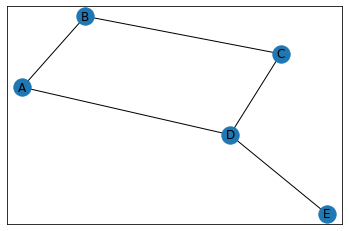

In [17]:
nx.draw_networkx(graph_1)

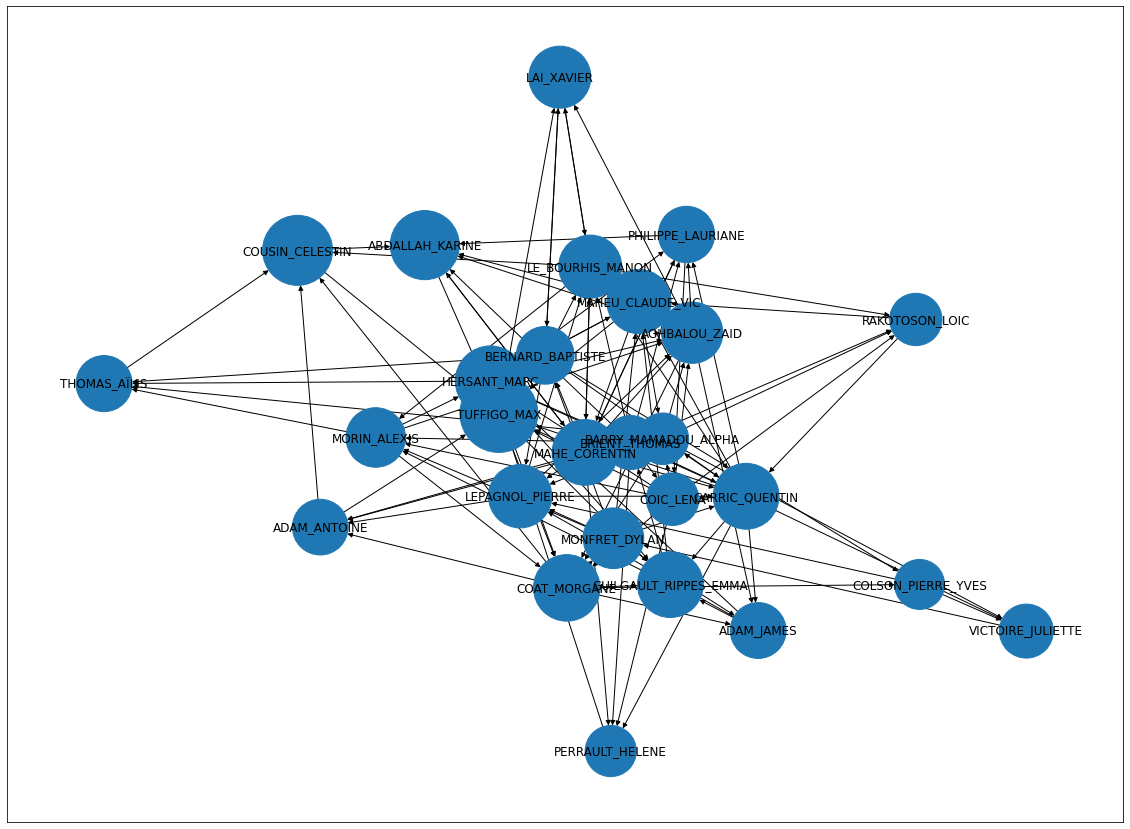

In [18]:
plt.rcParams["figure.figsize"] = (20, 15)
nx.draw_networkx(graph_2, node_size = np.array(list(nx.pagerank(graph_2, .5).values()))*10**5)

## Prédiction de liens
Évaluez la similarité, au sens de l'indice Adamic/Adar, entre toutes les paires de noeuds non adjacents du graphe non orienté `graph_1`

In [19]:
top_k_triplets(nx.adamic_adar_index(graph_1), 5)

[('D', 'B', 2.8853900817779268),
 ('A', 'C', 2.352934267515801),
 ('E', 'A', 0.9102392266268373),
 ('E', 'C', 0.9102392266268373),
 ('E', 'B', 0)]

Implémentez la fonction `generic_common_neighbors` utilisée par `generic_adamic_adar`.

In [20]:
def generic_common_neighbors(g, u, v):
    """
    Intersection of u's neighbors and v's neighbors
    :g: networkx graph
    :u, v: str, nodes
    :return: list, of common neighbors
    """
    common = set(g.neighbors(u)).intersection(g.neighbors(v))
    return list(common)

Pour chacun des deux graphes, quels sont les trois liens manquants les plus "prévisibles" ?

In [21]:
top_k_triplets(generic_adamic_adar(graph_1), 3)

[('D', 'B', 2.8853900817779268),
 ('A', 'C', 2.352934267515801),
 ('E', 'A', 0.9102392266268373)]

In [22]:
top_k_triplets(generic_adamic_adar(graph_2), 3)

[('MAHE_CORENTIN', 'BRIENT_THOMAS', 2.911230770325842),
 ('BRIENT_THOMAS', 'MAHE_CORENTIN', 2.911230770325842),
 ('COIC_LENA', 'CARRIC_QUENTIN', 1.9006202750275625)]